# Importing Libraries

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score, roc_curve, precision_recall_curve

# Loading Dataset

In [89]:
df = pd.read_csv("diabetic_data.csv")

# Data Exploration

In [90]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [91]:
print(df.shape)
print(df.describe())

(101766, 50)
       encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05      101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000       

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

# Checking Missing Value & Duplicate

In [93]:
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

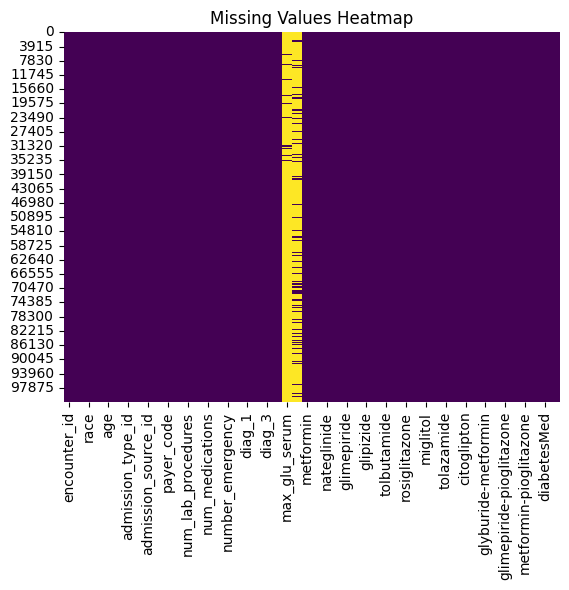

In [94]:
# Plot missing value
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

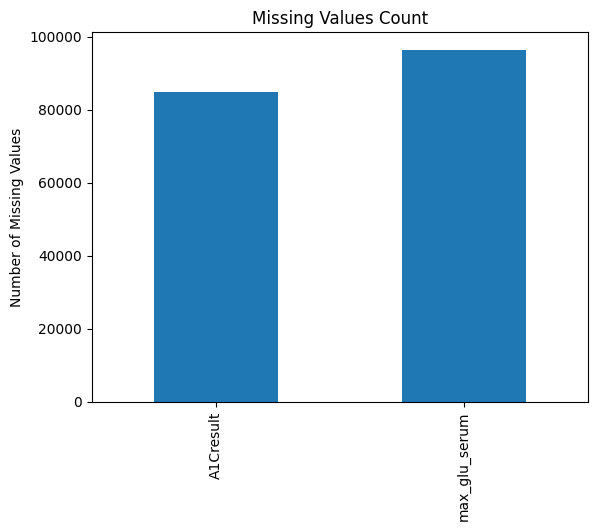

In [95]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values.plot.bar()
plt.title("Missing Values Count")
plt.ylabel("Number of Missing Values")
plt.show()


Number of duplicate rows: 0


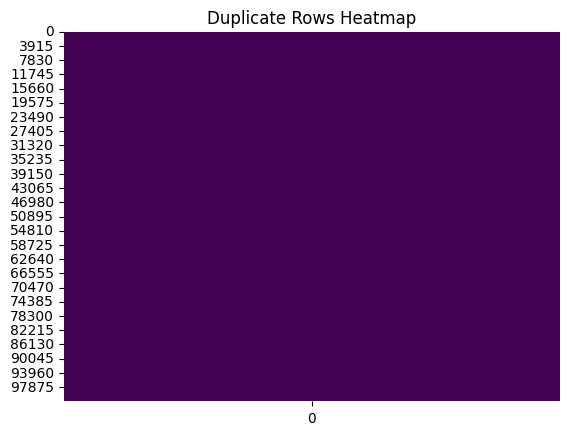

In [96]:
# plot duplicate values
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")
sns.heatmap(df.duplicated().values.reshape(-1, 1), cbar=False, cmap='viridis')
plt.title("Duplicate Rows Heatmap")
plt.show()

# Clean the data (Handle Missing Values)

#### Replace '?' with NaN in the entire DataFrame

In [97]:
df.replace('?', np.nan, inplace=True)

#### Replace 'Unknown/Invalid' in gender with NaN (only 3 entries)


In [98]:
df['gender'].replace('Unknown/Invalid', np.nan, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_30220\870714255.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].replace('Unknown/Invalid', np.nan, inplace=True)


#### Drop columns with high missing data (>30% or 100%)

In [99]:
cols_to_drop = ['weight', 'medical_specialty', 'payer_code', 'examide', 'citoglipton']
df.drop(columns=cols_to_drop, inplace=True)

#### Drop rows with missing values in remaining columns

In [100]:
# These include a small number of NaNs in 'race', 'gender', 'diag_1', 'diag_2', 'diag_3'
initial_rows_before_row_drop = len(df)
df.dropna(inplace=True)
rows_dropped_missing = initial_rows_before_row_drop - len(df)
print(f"Number of rows dropped due to missing values: {rows_dropped_missing}")

Number of rows dropped due to missing values: 101477


# Target Variable Transformation

In [101]:
# Convert multi-class target into binary classification:
# Readmitted within 30 days (<30) -> 1
# Not readmitted (NO or >30) -> 0
df['readmitted_binary'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

In [102]:
df.shape

(289, 46)

# Exploratory Data Analysis (EDA)

#### 2.1 Age vs. Readmission Rate

C:\Users\HP\AppData\Local\Temp\ipykernel_30220\2087151624.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age', y='readmission_rate', data=age_readmission, palette='viridis')


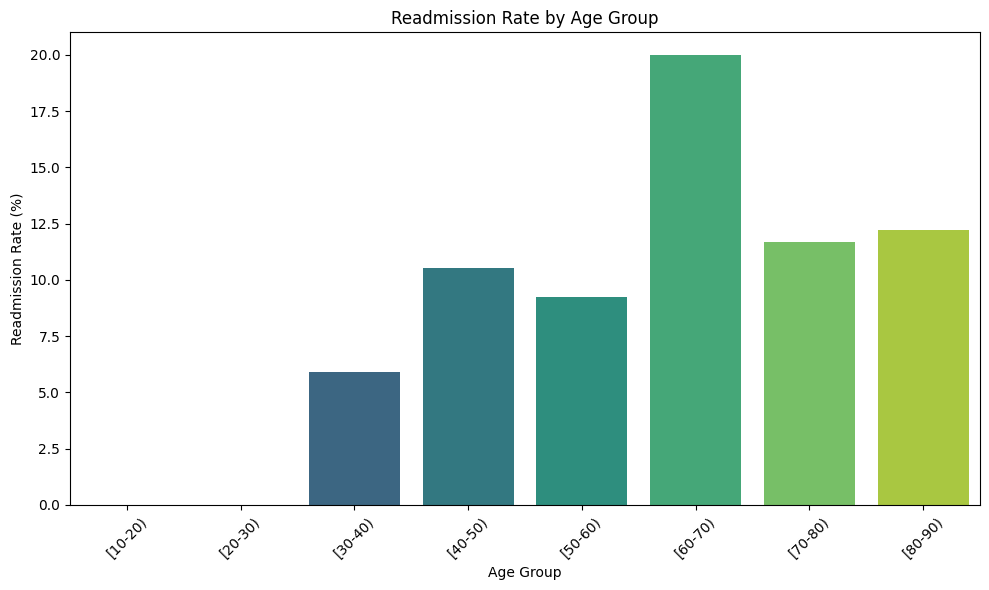

In [103]:
# Calculate the mean of 'readmitted_binary' (which is the readmission rate) for each age group
age_readmission = df.groupby('age')['readmitted_binary'].mean().reset_index()
age_readmission['readmission_rate'] = age_readmission['readmitted_binary'] * 100
# Sort by age group for correct visualization order
age_readmission = age_readmission.sort_values('age', ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='age', y='readmission_rate', data=age_readmission, palette='viridis')
plt.title('Readmission Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Readmission Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

####  2.2 Number of Medications vs. Readmission Rate

C:\Users\HP\AppData\Local\Temp\ipykernel_30220\2523019652.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  med_readmission = df.groupby('med_bins')['readmitted_binary'].mean().reset_index()
C:\Users\HP\AppData\Local\Temp\ipykernel_30220\2523019652.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='med_bins', y='readmission_rate', data=med_readmission, palette='magma')


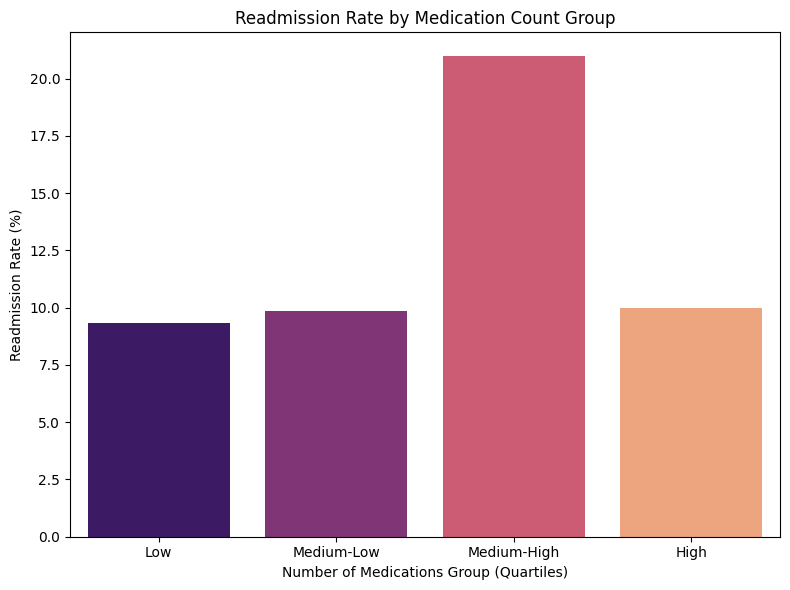

In [104]:
# Create four bins (quartiles) for the number of medications for better visual grouping
df['med_bins'] = pd.cut(
    df['num_medications'], 
    bins=4, 
    labels=['Low', 'Medium-Low', 'Medium-High', 'High'], 
    include_lowest=True
)

med_readmission = df.groupby('med_bins')['readmitted_binary'].mean().reset_index()
med_readmission['readmission_rate'] = med_readmission['readmitted_binary'] * 100

plt.figure(figsize=(8, 6))
sns.barplot(x='med_bins', y='readmission_rate', data=med_readmission, palette='magma')
plt.title('Readmission Rate by Medication Count Group')
plt.xlabel('Number of Medications Group (Quartiles)')
plt.ylabel('Readmission Rate (%)')
plt.tight_layout()
plt.show()

#### 2.3 Top Diagnosis Codes (diag_1) vs. Readmission Rate

C:\Users\HP\AppData\Local\Temp\ipykernel_30220\2583265245.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='diag_1', y='readmission_rate', data=diag_readmission, palette='cividis')


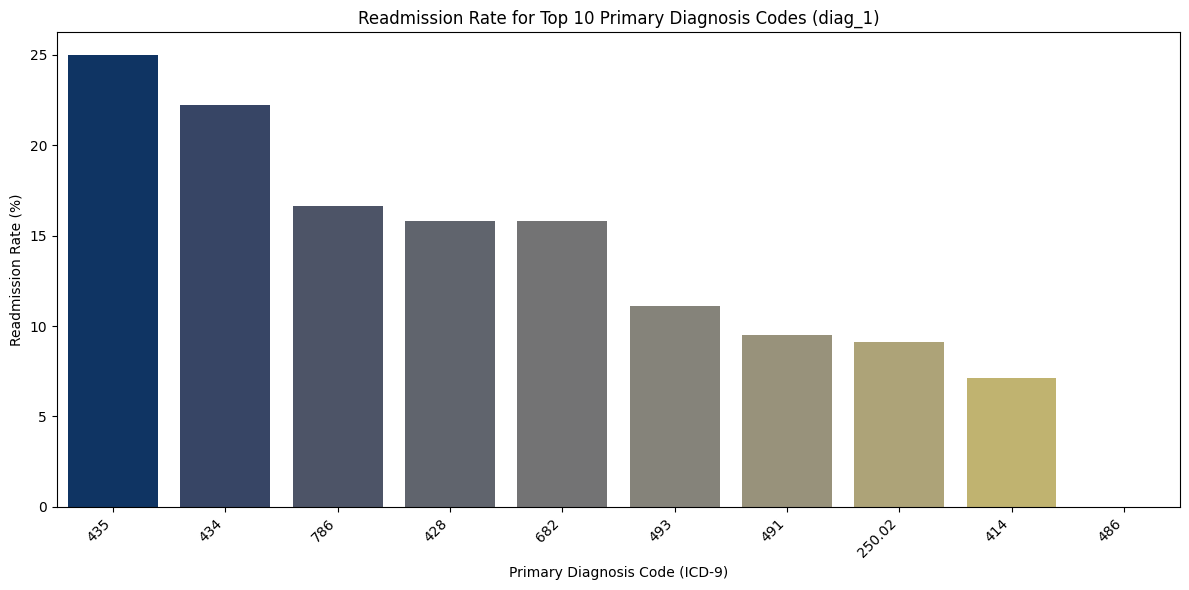

In [105]:
top_10_diag = df['diag_1'].value_counts().nlargest(10).index

# Calculate the readmission rate only for these top 10 codes
diag_readmission = (
    df[df['diag_1'].isin(top_10_diag)]
    .groupby('diag_1')['readmitted_binary']
    .mean()
    .reset_index()
)
diag_readmission['readmission_rate'] = diag_readmission['readmitted_binary'] * 100
diag_readmission = diag_readmission.sort_values('readmission_rate', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='diag_1', y='readmission_rate', data=diag_readmission, palette='cividis')
plt.title('Readmission Rate for Top 10 Primary Diagnosis Codes (diag_1)')
plt.xlabel('Primary Diagnosis Code (ICD-9)')
plt.ylabel('Readmission Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Feature Engineering

#### Polypharmacy Indicator (num_medications > X)

In [106]:
polypharmacy_threshold = df['num_medications'].quantile(0.75)
threshold_X = 15 
print(f"Using Polypharmacy Threshold (X) = {threshold_X} medications (based on 75th percentile being around 19).")

df['polypharmacy'] = (df['num_medications'] >= threshold_X).astype(int)

Using Polypharmacy Threshold (X) = 15 medications (based on 75th percentile being around 19).


#### Chronic Illness Flags from Diagnosis Codes

In [107]:
def is_within_icd9_range(code, start, end):

    if code in ['V', 'E', '?']:
        return False
    try:

        if '.' in code:
            code = code.split('.')[0]
        

        if code == '250': 
             return False

        code_int = int(code)
        return start <= code_int <= end
    except ValueError:

        return False

# Define the chronic illness categories and their ICD-9 ranges
chronic_conditions = {
    'circulatory': (390, 459), # Includes Hypertension, Heart Disease, Stroke, CHF
    'respiratory': (460, 519), # Includes COPD, Pneumonia
    'renal': (580, 629),      # Includes Kidney Disease
    'neoplasm': (140, 239)    # Includes Cancer
}


diag_cols = ['diag_1', 'diag_2', 'diag_3']

for name, (start, end) in chronic_conditions.items():

    df[f'has_{name}_flag'] = df[diag_cols].apply(
        lambda row: any(is_within_icd9_range(str(code), start, end) for code in row),
        axis=1
    ).astype(int)

#### Count of Past Procedures / Admissions

In [108]:
df['past_inpatient_admissions'] = df['number_inpatient']

df['past_emergency_admissions'] = df['number_emergency']

df['past_outpatient_admissions'] = df['number_outpatient']

df['num_current_procedures'] = df['num_procedures']

print("\nEngineered Features Created:")

print(df[['polypharmacy', 'has_circulatory_flag', 'has_respiratory_flag', 
          'has_renal_flag', 'has_neoplasm_flag', 'past_inpatient_admissions']].head().to_markdown(index=False, numalign="left", stralign="left"))


Engineered Features Created:
| polypharmacy   | has_circulatory_flag   | has_respiratory_flag   | has_renal_flag   | has_neoplasm_flag   | past_inpatient_admissions   |
|:---------------|:-----------------------|:-----------------------|:-----------------|:--------------------|:----------------------------|
| 0              | 1                      | 0                      | 0                | 0                   | 0                           |
| 1              | 0                      | 0                      | 0                | 0                   | 0                           |
| 0              | 0                      | 0                      | 0                | 0                   | 0                           |
| 1              | 0                      | 0                      | 0                | 0                   | 0                           |
| 0              | 0                      | 0                      | 0                | 0                   | 0                   

# Feature and Target Separation

In [ ]:
TARGET = 'readmitted_binary'
y = df[TARGET]

# Drop ID columns, original target columns, and diagnosis columns (they were used for flags)
cols_to_drop = [
    'encounter_id', 'patient_nbr', 'readmitted', TARGET, 
    'diag_1', 'diag_2', 'diag_3', 'med_bins' # med_bins was temporary for EDA
]
X = df.drop(columns=cols_to_drop, errors='ignore')

### Feature Preprocessing (One-Hot Encoding and Scaling)

In [112]:
# Identify feature types
numeric_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        # Apply One-Hot Encoding to categorical features
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features),
        # Apply Standard Scaling to numeric features
        ('num', StandardScaler(), numeric_features)
    ],
    remainder='passthrough' # Keep any other columns if they exist (though they shouldn't here)
)

#### Model Training with Stratified Cross-Validation

In [113]:
# Since the goal is to optimize for F1-score or Recall, we use these metrics
from sklearn.model_selection import cross_validate


scoring_metrics = ['f1', 'recall', 'precision', 'roc_auc']

# Use StratifiedKFold due to class imbalance (~11.3% positive class)
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# --- Classifier 1: Logistic Regression ---
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(
                                  random_state=42, 
                                  solver='liblinear', 
                                  class_weight='balanced', # Use balanced weight to help with imbalance
                                  max_iter=1000)
                              )])

print("Training Logistic Regression Model with Stratified Cross-Validation...")
lr_scores = cross_validate(
    lr_pipeline, X, y, 
    cv=cv_strategy, 
    scoring=scoring_metrics, 
    n_jobs=-1
)

Training Logistic Regression Model with Stratified Cross-Validation...


# --- Classifier 2: XGBoost Classifier ---

In [115]:
from xgboost import XGBClassifier


xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', XGBClassifier(
                                   random_state=42,
                                   use_label_encoder=False,
                                   eval_metric='logloss',
                                   # Tune the scale_pos_weight for imbalance
                                   scale_pos_weight=(y.value_counts()[0] / y.value_counts()[1]),
                                   n_estimators=100)
                               )])

print("Training XGBoost Classifier Model with Stratified Cross-Validation...")
xgb_scores = cross_validate(
    xgb_pipeline, X, y, 
    cv=cv_strategy, 
    scoring=scoring_metrics, 
    n_jobs=-1
)

Training XGBoost Classifier Model with Stratified Cross-Validation...


### Results Aggregation

In [116]:
def format_results(scores):
    """Calculates and formats the mean scores from cross_validate output."""
    results = {}
    for metric in scoring_metrics:
        mean_score = np.mean(scores[f'test_{metric}'])
        results[metric] = f"{mean_score:.4f}"
    return results

lr_results = format_results(lr_scores)
xgb_results = format_results(xgb_scores)

# Display a comparison table of results
results_df = pd.DataFrame({
    'Metric': scoring_metrics,
    'Logistic Regression (Balanced)': list(lr_results.values()),
    'XGBoost (Weighted)': list(xgb_results.values())
})

print("\n\nModel Performance Comparison (5-Fold Stratified CV):")
print(results_df.to_markdown(index=False, numalign="left", stralign="left"))



Model Performance Comparison (5-Fold Stratified CV):
| Metric    | Logistic Regression (Balanced)   | XGBoost (Weighted)   |
|:----------|:---------------------------------|:---------------------|
| f1        | 0.1581                           | 0.1844               |
| recall    | 0.3143                           | 0.1429               |
| precision | 0.1069                           | 0.2983               |
| roc_auc   | 0.4597                           | 0.566                |


# --- Identify Best Model (based on F1-Score) ---

In [117]:
best_model_name = 'XGBoost' if float(xgb_results['f1']) > float(lr_results['f1']) else 'Logistic Regression'
best_pipeline = xgb_pipeline if float(xgb_results['f1']) > float(lr_results['f1']) else lr_pipeline

print(f"\nConclusion: The {best_model_name} model performed best based on F1-Score.")


Conclusion: The XGBoost model performed best based on F1-Score.


### Fit the best model on the full data for final interpretation

In [118]:
best_pipeline.fit(X, y)
print(f"The best model ({best_model_name}) has been fitted on the entire dataset.")

The best model (XGBoost) has been fitted on the entire dataset.


c:\Users\HP\.conda\envs\python_ML\lib\site-packages\xgboost\training.py:199: UserWarning: [15:17:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


### Save the fitted pipeline and the feature names for SHAP analysis

In [119]:
import joblib
joblib.dump(best_pipeline, 'best_readmission_model.pkl')
joblib.dump(X.columns.tolist(), 'feature_names.pkl')
print("Fitted model and feature names saved.")

Fitted model and feature names saved.


#### Model Interpretation (Feature Importance)

In [ ]:
pre = lr_pipeline.named_steps['preprocessor']
ohe_feature_names = pre.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([ohe_feature_names, numeric_features])

clf = None
for pipe_name in ('rf_pipeline', 'best_pipeline', 'xgb_pipeline', 'lr_pipeline'):
    if pipe_name in globals():
        pipe = globals()[pipe_name]
        if hasattr(pipe.named_steps['classifier'], 'feature_importances_'):
            clf = pipe.named_steps['classifier']
            break

if clf is not None:
    importances = clf.feature_importances_
else:
    if hasattr(lr_pipeline.named_steps['classifier'], 'coef_'):
        coefs = lr_pipeline.named_steps['classifier'].coef_.ravel()
        importances = np.abs(coefs)
    else:
        raise AttributeError("No fitted classifier with 'feature_importances_' or 'coef_' found. Fit a tree-based or linear model first.")

if isinstance(importances, pd.Series):
    try:
        importances = importances.reindex(all_feature_names).fillna(0).values
    except Exception:
        importances = importances.values
else:
    importances = np.asarray(importances)

In [122]:
ohe_feature_names = lr_pipeline['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([ohe_feature_names, numeric_features])

In [ ]:
min_len = min(len(all_feature_names), len(importances))
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names[:min_len],
    'Importance': importances[:min_len]
})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(15)

C:\Users\HP\AppData\Local\Temp\ipykernel_30220\2671753487.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


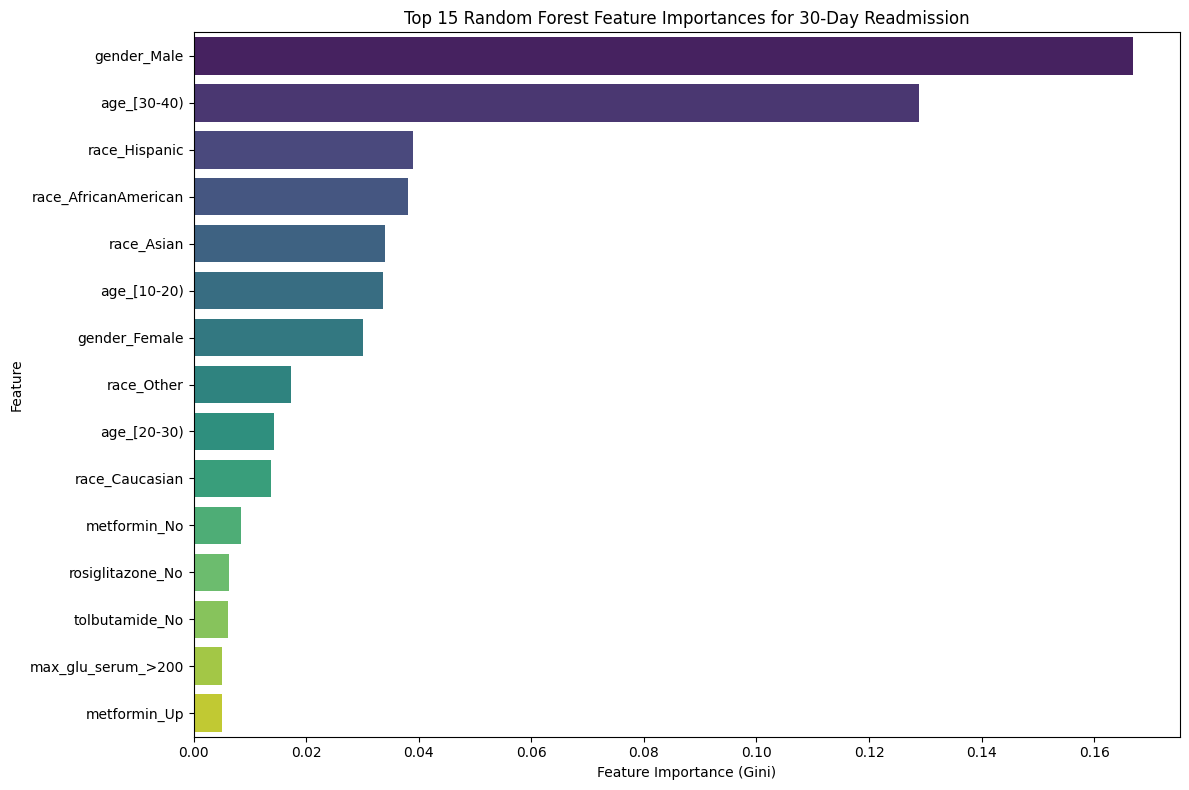


--- Top 5 Most Important Features ---
| Feature              | Importance   |
|:---------------------|:-------------|
| gender_Male          | 0.166909     |
| age_[30-40)          | 0.128834     |
| race_Hispanic        | 0.0389222    |
| race_AfricanAmerican | 0.0380309    |
| race_Asian           | 0.0340546    |


In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Top 15 Random Forest Feature Importances for 30-Day Readmission')
plt.xlabel('Feature Importance (Gini)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("\n--- Top 5 Most Important Features ---")
print(feature_importance_df.head(5).to_markdown(index=False, numalign="left", stralign="left"))

C:\Users\HP\AppData\Local\Temp\ipykernel_30220\3740362976.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].replace('Unknown/Invalid', np.nan, inplace=True)


Fitting Random Forest model...


C:\Users\HP\AppData\Local\Temp\ipykernel_30220\3740362976.py:117: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


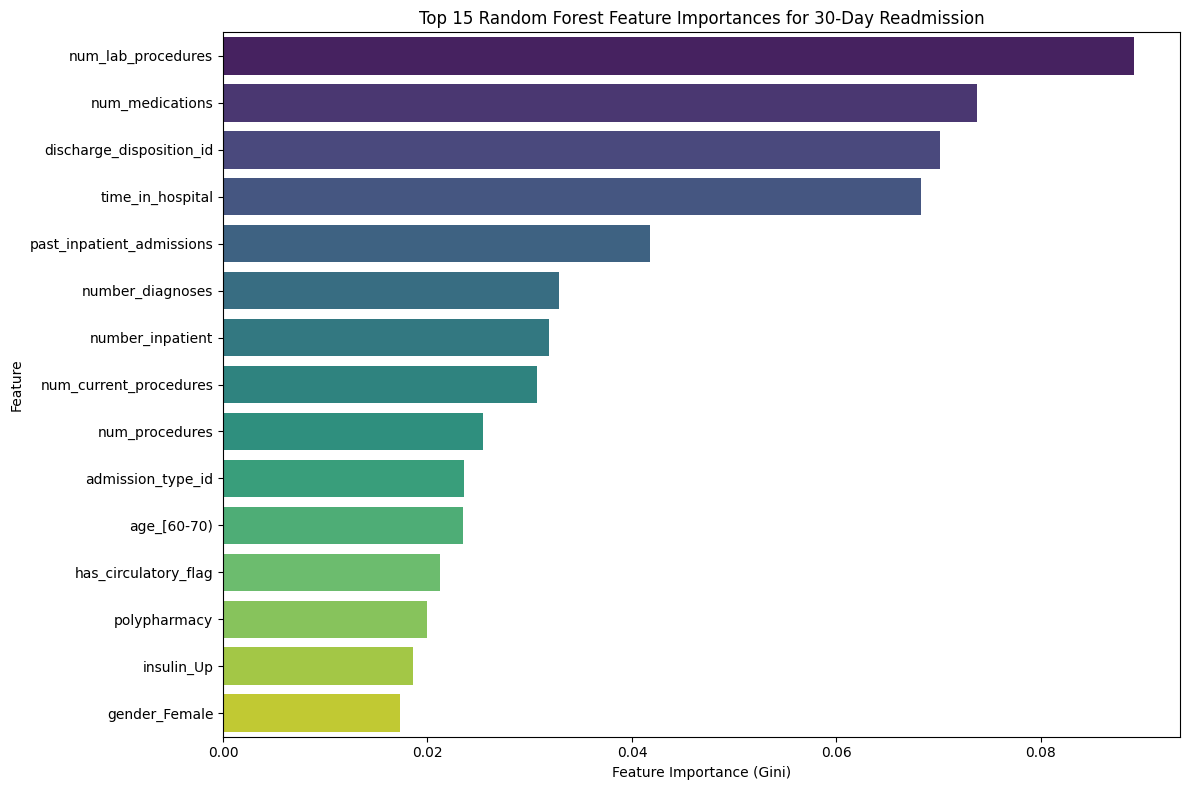


--- Top 5 Most Important Features ---
| Feature                   | Importance   |
|:--------------------------|:-------------|
| num_lab_procedures        | 0.0891498    |
| num_medications           | 0.073761     |
| discharge_disposition_id  | 0.0701379    |
| time_in_hospital          | 0.0682799    |
| past_inpatient_admissions | 0.0417285    |


In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the initial dataset
df = pd.read_csv("diabetic_data.csv")

# ====================================================================
# 1. & 3. Data Preparation and Feature Engineering (Re-applied for self-contained code)
# ====================================================================

# 1. Data Preprocessing
df.replace('?', np.nan, inplace=True)
df['gender'].replace('Unknown/Invalid', np.nan, inplace=True)
cols_to_drop = ['weight', 'medical_specialty', 'payer_code', 'examide', 'citoglipton']
df.drop(columns=cols_to_drop, inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df['readmitted_binary'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

# 3. Feature Engineering
# Polypharmacy Indicator (num_medications >= 15)
threshold_X = 15
df['polypharmacy'] = (df['num_medications'] >= threshold_X).astype(int)

# Chronic Illness Flags from Diagnosis Codes
def is_within_icd9_range(code, start, end):
    if code in ['V', 'E']: return False
    try:
        if '.' in code:
            code = code.split('.')[0]
        if code == '250': return False
        code_int = int(code)
        return start <= code_int <= end
    except ValueError:
        return False

chronic_conditions = {'circulatory': (390, 459), 'respiratory': (460, 519), 'renal': (580, 629), 'neoplasm': (140, 239)}
diag_cols = ['diag_1', 'diag_2', 'diag_3']

for name, (start, end) in chronic_conditions.items():
    df[f'has_{name}_flag'] = df[diag_cols].apply(
        lambda row: any(is_within_icd9_range(str(code), start, end) for code in row), axis=1
    ).astype(int)

# Past Admission/Procedure Counts
df['past_inpatient_admissions'] = df['number_inpatient']
df['past_emergency_admissions'] = df['number_emergency']
df['past_outpatient_admissions'] = df['number_outpatient']
df['num_current_procedures'] = df['num_procedures']


# ====================================================================
# 4. Modeling Setup (Random Forest Pipeline)
# ====================================================================

TARGET = 'readmitted_binary'
y = df[TARGET]
cols_to_drop = [
    'encounter_id', 'patient_nbr', 'readmitted', TARGET,
    'diag_1', 'diag_2', 'diag_3'
]
X = df.drop(columns=cols_to_drop, errors='ignore')

# Identify feature types
numeric_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features),
        ('num', StandardScaler(), numeric_features)
    ],
    remainder='passthrough'
)

# Random Forest Classifier with class balancing
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(
                                  random_state=42,
                                  n_estimators=100,
                                  class_weight='balanced',
                                  n_jobs=-1)
                              )])

print("Fitting Random Forest model...")
rf_pipeline.fit(X, y)

# ====================================================================
# 5. Model Interpretation (Feature Importance)
# ====================================================================

# Extract feature importances from the fitted RF classifier
importances = rf_pipeline['classifier'].feature_importances_

# Get the names of the transformed features
ohe_feature_names = rf_pipeline['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([ohe_feature_names, numeric_features])

# Create a DataFrame of feature importance
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
})

# Sort by importance and get the top 15
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(15)

# Plotting the top 15 features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Top 15 Random Forest Feature Importances for 30-Day Readmission')
plt.xlabel('Feature Importance (Gini)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show() # Use plt.show() in a notebook environment

print("\n--- Top 5 Most Important Features ---")
print(feature_importance_df.head(5).to_markdown(index=False, numalign="left", stralign="left"))